In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [20]:
# np.arange(x, y) creates a series that contains all the values of the set [x, y)
furniture = ctrl.Antecedent(np.arange(0, 11), 'furniture')
included_bills = ctrl.Antecedent(np.arange(0, 11), 'included_bills')
localization = ctrl.Antecedent(np.arange(0, 11), 'localization')
price = ctrl.Consequent(np.arange(0, 1001, 1), 'price')

furniture.automf(names=['none', 'partial', 'complete'])
included_bills.automf(names=['none', 'partial', 'complete'])
localization.automf(names=['far', 'close', 'very close'])

price['cheap'] = fuzz.trimf(price.universe, [0, 0, 250])
price['medium'] = fuzz.trimf(price.universe, [200, 500, 750])
price['expansive'] = fuzz.trimf(price.universe, [700, 1000, 1000])

/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


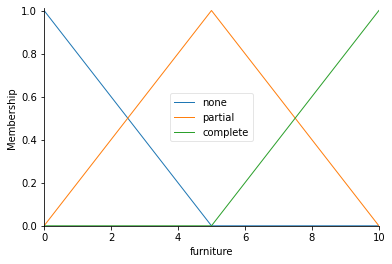

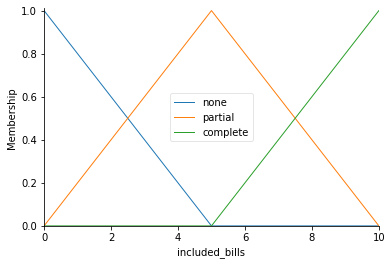

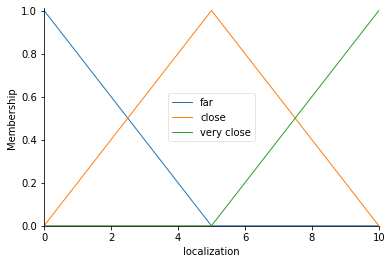

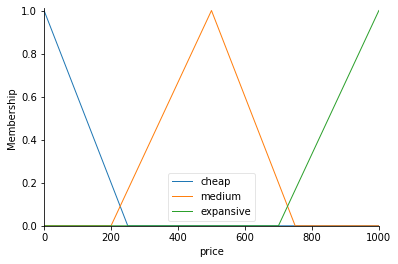

In [21]:
furniture.view()
included_bills.view()
localization.view()
price.view()

## Rules

### Furniture + included bills rules

In [25]:
furniture_included_bills_rules = [
    ctrl.Rule(furniture['none'] | included_bills['none'], price['cheap']),
    ctrl.Rule(furniture['partial'] | included_bills['partial'], price['medium']),
    ctrl.Rule(furniture['complete'] | included_bills['complete'], price['expansive'])   
]

### Localization rules

In [26]:
localization_rules = [
    ctrl.Rule(localization['far'], price['cheap']),
    ctrl.Rule(localization['close'], price['medium']),
    ctrl.Rule(localization['very close'], price['expansive']),
]

In [28]:
rules = localization_rules + furniture_included_bills_rules

## Simulations

### Price by all

In [33]:
property_ctrl = ctrl.ControlSystem(rules)
property_simulation = ctrl.ControlSystemSimulation(property_ctrl)
property_simulation.input['furniture'] = 4;
property_simulation.input['included_bills'] = 7;
property_simulation.input['localization'] = 10;
property_simulation.compute();
print(property_simulation.output['price']);

583.9395379677377


### Price by localization

In [32]:
price_by_loc = ctrl.ControlSystem(localization_rules)
price_by_loc_simulation = ctrl.ControlSystemSimulation(price_by_loc)
price_by_loc_simulation.input['localization'] = 3
price_by_loc_simulation.compute()
print(price_by_loc_simulation.output['price'])

385.0112288702905
